
<h2>Coleta, Preparação e Análise de Dados</h2>
<h3>Prof. Luan Garcia</h3>    

Material adaptado do notebook originalmente desenvolvido por: <a href="http://lattes.cnpq.br/2532893661927339">Renato Moraes Silva</a>

 <hr style="height:2px"> 


## Introdução

Frequentemente, a visualização dos dados auxilia na interpretação e na análise de como eles estão distribuídos. O Python possui algumas bibliotecas que facilitam o processo de visualização, tais como: `Pandas`, `Matplotlib` e `Seaborn`. 

Neste trabalho, utilizaremos a base de dados Iris [1] que está na pasta raiz deste exercício. É importante destacar que a base de dados Iris usada neste exercício foi modificada pelos autores por motivos didáticos [2]. A versão original dela pode ser encontrada no seguinte link: <https://archive.ics.uci.edu/ml/datasets/iris>. 

Usando a versão modificada dessa base de dados, os seguintes tópicos serão abordados:
- eliminação de atributos irrelevantes 
- tratamento de valores faltantes 
- tratamento de valores redundantes ou inconsistentes
- normalização dos dados
- detecção e remoção de *outliers* 
- análise da distribuição das classes
- correlação entre os atributos

Para cada um destes tópicos, serão propostos exercícios ou serão apresentadas maneiras de como realizar a tarefa em questão.

Seu trabalho é implementar o que é pedido nos exercícios abaixo e compreender o que está acontecendo ao longo do notebook.

---
## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.5` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas (preferencialmente em um ambiente virtual conda):

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas


Será utilizado também o conjuntos de dados disponibilizado junto com este *notebook*, que se encontra no diretório `datasets`, em formato de arquivo `.csv`.

---
## Carregando os dados

Primeiro, vamos importar todas as bibliotecas que serão utilizadas ao longo deste exercício.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

Em seguida, os dados serão carregados do arquivo para um DataFrame pandas.

In [2]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'datasets/iris.csv', sep=',', index_col=None) 

Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados.

In [3]:
# exibe o dataframe
# df_dataset.head(n=10)
df_dataset

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
...,...,...,...,...,...,...,...
147,145,6.7,3.0,5.2,2.3,São Paulo,Iris-virginica
148,146,6.3,2.5,5.0,1.9,Campinas,Iris-virginica
149,147,6.5,3.0,5.2,2.0,Sorocaba,Iris-virginica
150,148,6.2,3.4,5.4,2.3,Sorocaba,Iris-virginica


A base de dados contém amostras de flores (linhas) representadas pelos seguintes atributos (colunas): `id_planta`, `comprimento_sepala`, `largura_sepala`, `comprimento_petala`, `largura_petala` e `cidade_origem`. Por fim, temos o atributo `classe` que contém a espécie de cada flor.

O atributo `id_planta` é qualitativo, uma vez que é usado para identificar uma determinada amostra. Apesar dele possuir valores numéricos crescentes, ele exerce apenas a função de identificação e seus valores poderiam ser trocados por outros identificadores não numéricos sem nenhum prejuízo. O atributo `cidade_origem` também é qualitativo. Os atributos `comprimento_sepala`, `largura_sepala`, `comprimento_petala` e `largura_petala` são quantitativos contínuos.

Quanto à escala, os atributos `id_planta` e `cidade_origem` são qualitativos nominais, enquanto os atributos `comprimento_sepala`, `largura_sepala`, `comprimento_petala` e `largura_petala` são quantitativos racionais.

O atributo `classe` é qualitativo nominal e representa espécies de flores. 



## Atividades

O nosso objetivo é preparar o dataset das flores Iris para uma tarefa de aprendizado de máquina (classificação). Caso não saiba o que é isto, não se preocupe, nosso objetivo é apenas preparar o dataset, não gerar algum tipo de modelo.

O que desejamos no futuro é utilizar este dataset para identificar de forma automática a espécie de uma flor (`classe`), dados os demais atributos. 

# Eliminação de atributos irrelevantes


Não é preciso uma análise profunda para observar que os atributos `id_planta` e `cidade_origem` não contribuem para a identificação da classe. Portanto, como o dataset será utilizado para uma tarefa de aprendizado de máquina, podemos remover esses atributos, pois são irrelevantes. Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.

### Exercício

1. Remova do dataset os atributos `id_planta` e `cidade_origem`. 

In [4]:
new_dataset = df_dataset.drop(columns=['id_planta', 'cidade_origem'])
new_dataset

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
147,6.7,3.0,5.2,2.3,Iris-virginica
148,6.3,2.5,5.0,1.9,Iris-virginica
149,6.5,3.0,5.2,2.0,Iris-virginica
150,6.2,3.4,5.4,2.3,Iris-virginica


# Tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados. Começaremos analisando nosso dataset para verificar se existem valores faltantes.

### Exercício

2. Armazene na variável `idxRowNan` abaixo os índices das linhas do dataset que possuem algum valor faltante.

<b>Atenção</b>: Não necessariamente estarão faltando valores para todos atributos de uma linha.

In [5]:
null_mask = new_dataset.isna().any(axis='columns') # Retorna booleano. True se tem null na linha
linhas_na = new_dataset[null_mask] # Retorna as linhas que tem algum campo null

idxRowNaN = linhas_na.index # Guarda somente os ids das linhas com nulls

print(idxRowNaN)

Index([23, 24, 30], dtype='int64')


Com o comando abaixo podemos visualizar apenas os registros (linhas) que possuem valores faltantes. Como resultado esperado, devemos poder verificar que o atributo `largura_sepala` possui 2 amostras com valores ausentes e o atributo `comprimento_petala` possui 1 amostra com valor faltante. 

In [6]:
df_dataset.iloc[idxRowNaN]

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
23,23,5.1,NaN,1.7,0.5,Sorocaba,Iris-setosa
24,24,4.8,NaN,1.9,0.2,São Paulo,Iris-setosa
30,30,4.8,3.1,NaN,0.2,Campinas,Iris-setosa


Como podemos ver todos os casos de valores faltantes ocorreram para instâncias da classe `Iris-setosa`. Este fato será relevante para nossa próxima tarefa.

Existem diversas técnicas para tratar atributos faltantes. Como este problema possui poucos valores ausentes, vamos utilizar a média dos valores conhecidos da respectiva classe (`Iris-setosa`) para preencher nosso dataset.


### Exercício

3. Substitua os valores faltantes da coluna `largura_sepala` com a média dos valores desta coluna para instâncias de `Iris-setosa`.

4. Substitua os valores faltantes da coluna `comprimento_petala` com a média dos valores desta coluna para instâncias de `Iris-setosa`.

In [8]:

IS = new_dataset.where(new_dataset.classe == 'Iris-setosa').dropna()
media_lard_sep = IS.largura_sepala.mean(skipna=True)
media_comp_pet = IS.comprimento_petala.mean(skipna=True)

new_dataset.largura_sepala = new_dataset.largura_sepala.fillna(media_lard_sep)
new_dataset.comprimento_petala = new_dataset.comprimento_petala.fillna(media_comp_pet)


Se tudo ocorreu corretamente, abaixo será possível visualizar os registros que anteriormente possuíam valores faltantes preenchidos.
Para a `largura_sepala` o valor esperado é aproximadamente $3.416$, já para `comprimento_petala`o valor esperado é aproximadamente $1.461$.

In [9]:
new_dataset.loc[idxRowNaN]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.423404,1.700000,0.5,Iris-setosa
24,4.8,3.423404,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.446809,0.2,Iris-setosa


# Tratamento de dados inconsistentes ou redundantes

Outro passo importante, é verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há amostras representadas por atributos com todos os valores iguais, mas com classes diferentes. A redundância é dada pela repetição de linhas na base de dados.

A seguir, vamos verificar se existem amostras duplicadas (redundantes) e inconsistentes.

In [56]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
9,9,4.9,3.1,1.5,0.1,Sorocaba,Iris-setosa
34,34,4.9,3.1,1.5,0.1,São Paulo,Iris-setosa
37,37,4.9,3.1,1.5,0.1,Campinas,Iris-setosa
49,49,5.0,3.3,1.4,0.2,Campinas,Iris-setosa
50,49,5.0,3.3,1.4,0.2,Campinas,Iris-versicolor
102,101,5.8,2.7,5.1,1.9,São Paulo,Iris-virginica
123,122,7.7,2.8,6.7,2.0,Campinas,Iris-virginica
124,122,7.7,2.8,6.7,2.0,Campinas,Iris-virginica
144,142,5.8,2.7,5.1,1.9,Campinas,Iris-virginica


Como podemos ver, existem algumas amostras redundantes (duplicadas) e outras inconsistentes (amostras iguais, mas com classes distintas). 

### Exercício
5. Remova as instâncias redudantes e as instâncias inconsistentes.

In [57]:
#remova as instâncias redudantes / incosistentes aqui


Abaixo podemos verificar se ainda existem amostras redudantes ou incosistentes.

In [58]:
# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se tiver valores redundantes ou inconsistentes, imprime 
if len(df_duplicates)>0:
    display(df_duplicates)
else:
    print('Não existem amostras redundantes ou inconsistentes')
    

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
9,9,4.9,3.1,1.5,0.1,Sorocaba,Iris-setosa
34,34,4.9,3.1,1.5,0.1,São Paulo,Iris-setosa
37,37,4.9,3.1,1.5,0.1,Campinas,Iris-setosa
49,49,5.0,3.3,1.4,0.2,Campinas,Iris-setosa
50,49,5.0,3.3,1.4,0.2,Campinas,Iris-versicolor
102,101,5.8,2.7,5.1,1.9,São Paulo,Iris-virginica
123,122,7.7,2.8,6.7,2.0,Campinas,Iris-virginica
124,122,7.7,2.8,6.7,2.0,Campinas,Iris-virginica
144,142,5.8,2.7,5.1,1.9,Campinas,Iris-virginica


# Normalização dos atributos

Agora, vamos gerar algumas estatísticas sobre a base de dados.

A função `describe()` da biblioteca `Pandas` sumariza as principais estatísticas sobre os dados de um *data frame*, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.



In [59]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

df_detalhes

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,152.000000,152.000000,150.000000,151.000000,152.000000
mean,74.644737,5.942105,3.182000,3.776821,1.197368
std,43.378880,1.479284,1.692545,1.776455,0.765216
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.750000,5.100000,2.800000,1.550000,0.300000
50%,74.500000,5.800000,3.000000,4.400000,1.300000
75%,112.250000,6.400000,3.300000,5.100000,1.800000
max,149.000000,20.900000,23.100000,6.900000,2.500000



Observe que a média do atributo `comprimento_sepala` é bastante superior a média do atributo `largura_petala`. Diante disso, está claro que a escala dos atributos é diferente, o que pode prejudicar alguns métodos de aprendizado de máquina.

### Exercício
6. Normalize os valores de todos atributos numéricos utilizando a técnica de normalização z-score (standardizaton).

In [60]:
#Normalize o dataset aqui

Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

In [61]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes.round(8))

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,152.000000,152.000000,150.000000,151.000000,152.000000
mean,74.644737,5.942105,3.182000,3.776821,1.197368
std,43.378880,1.479284,1.692545,1.776455,0.765216
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.750000,5.100000,2.800000,1.550000,0.300000
50%,74.500000,5.800000,3.000000,4.400000,1.300000
75%,112.250000,6.400000,3.300000,5.100000,1.800000
max,149.000000,20.900000,23.100000,6.900000,2.500000


Podemos ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1. 

# Detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

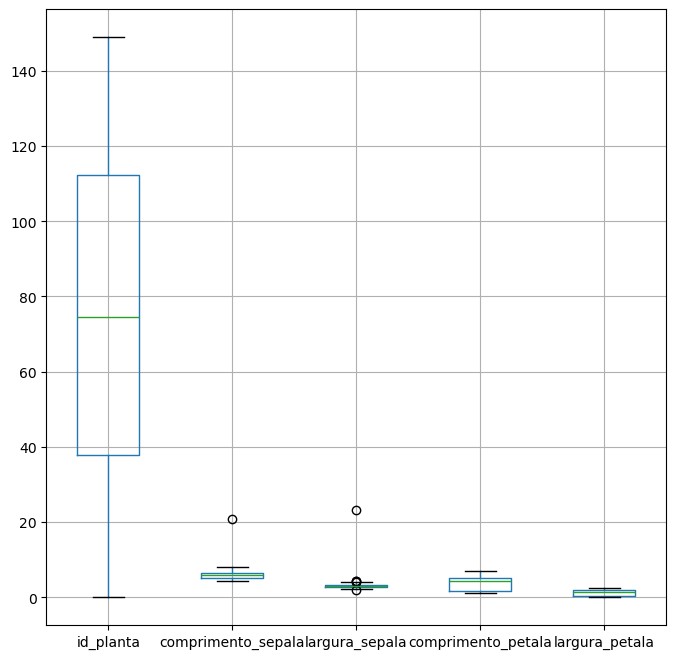

In [62]:
# gera um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que os atributos `comprimento_sepala` e `largura_sepala` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois provavelmente tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Podemos plotar gráficos de dispersão a partir dos _dataframes_ utilizando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos.

c:\Users\vicen\anaconda3\envs\dataprep\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vicen\anaconda3\envs\dataprep\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vicen\anaconda3\envs\dataprep\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vicen\anaconda3\envs\dataprep\Lib\site-packages\seaborn\_

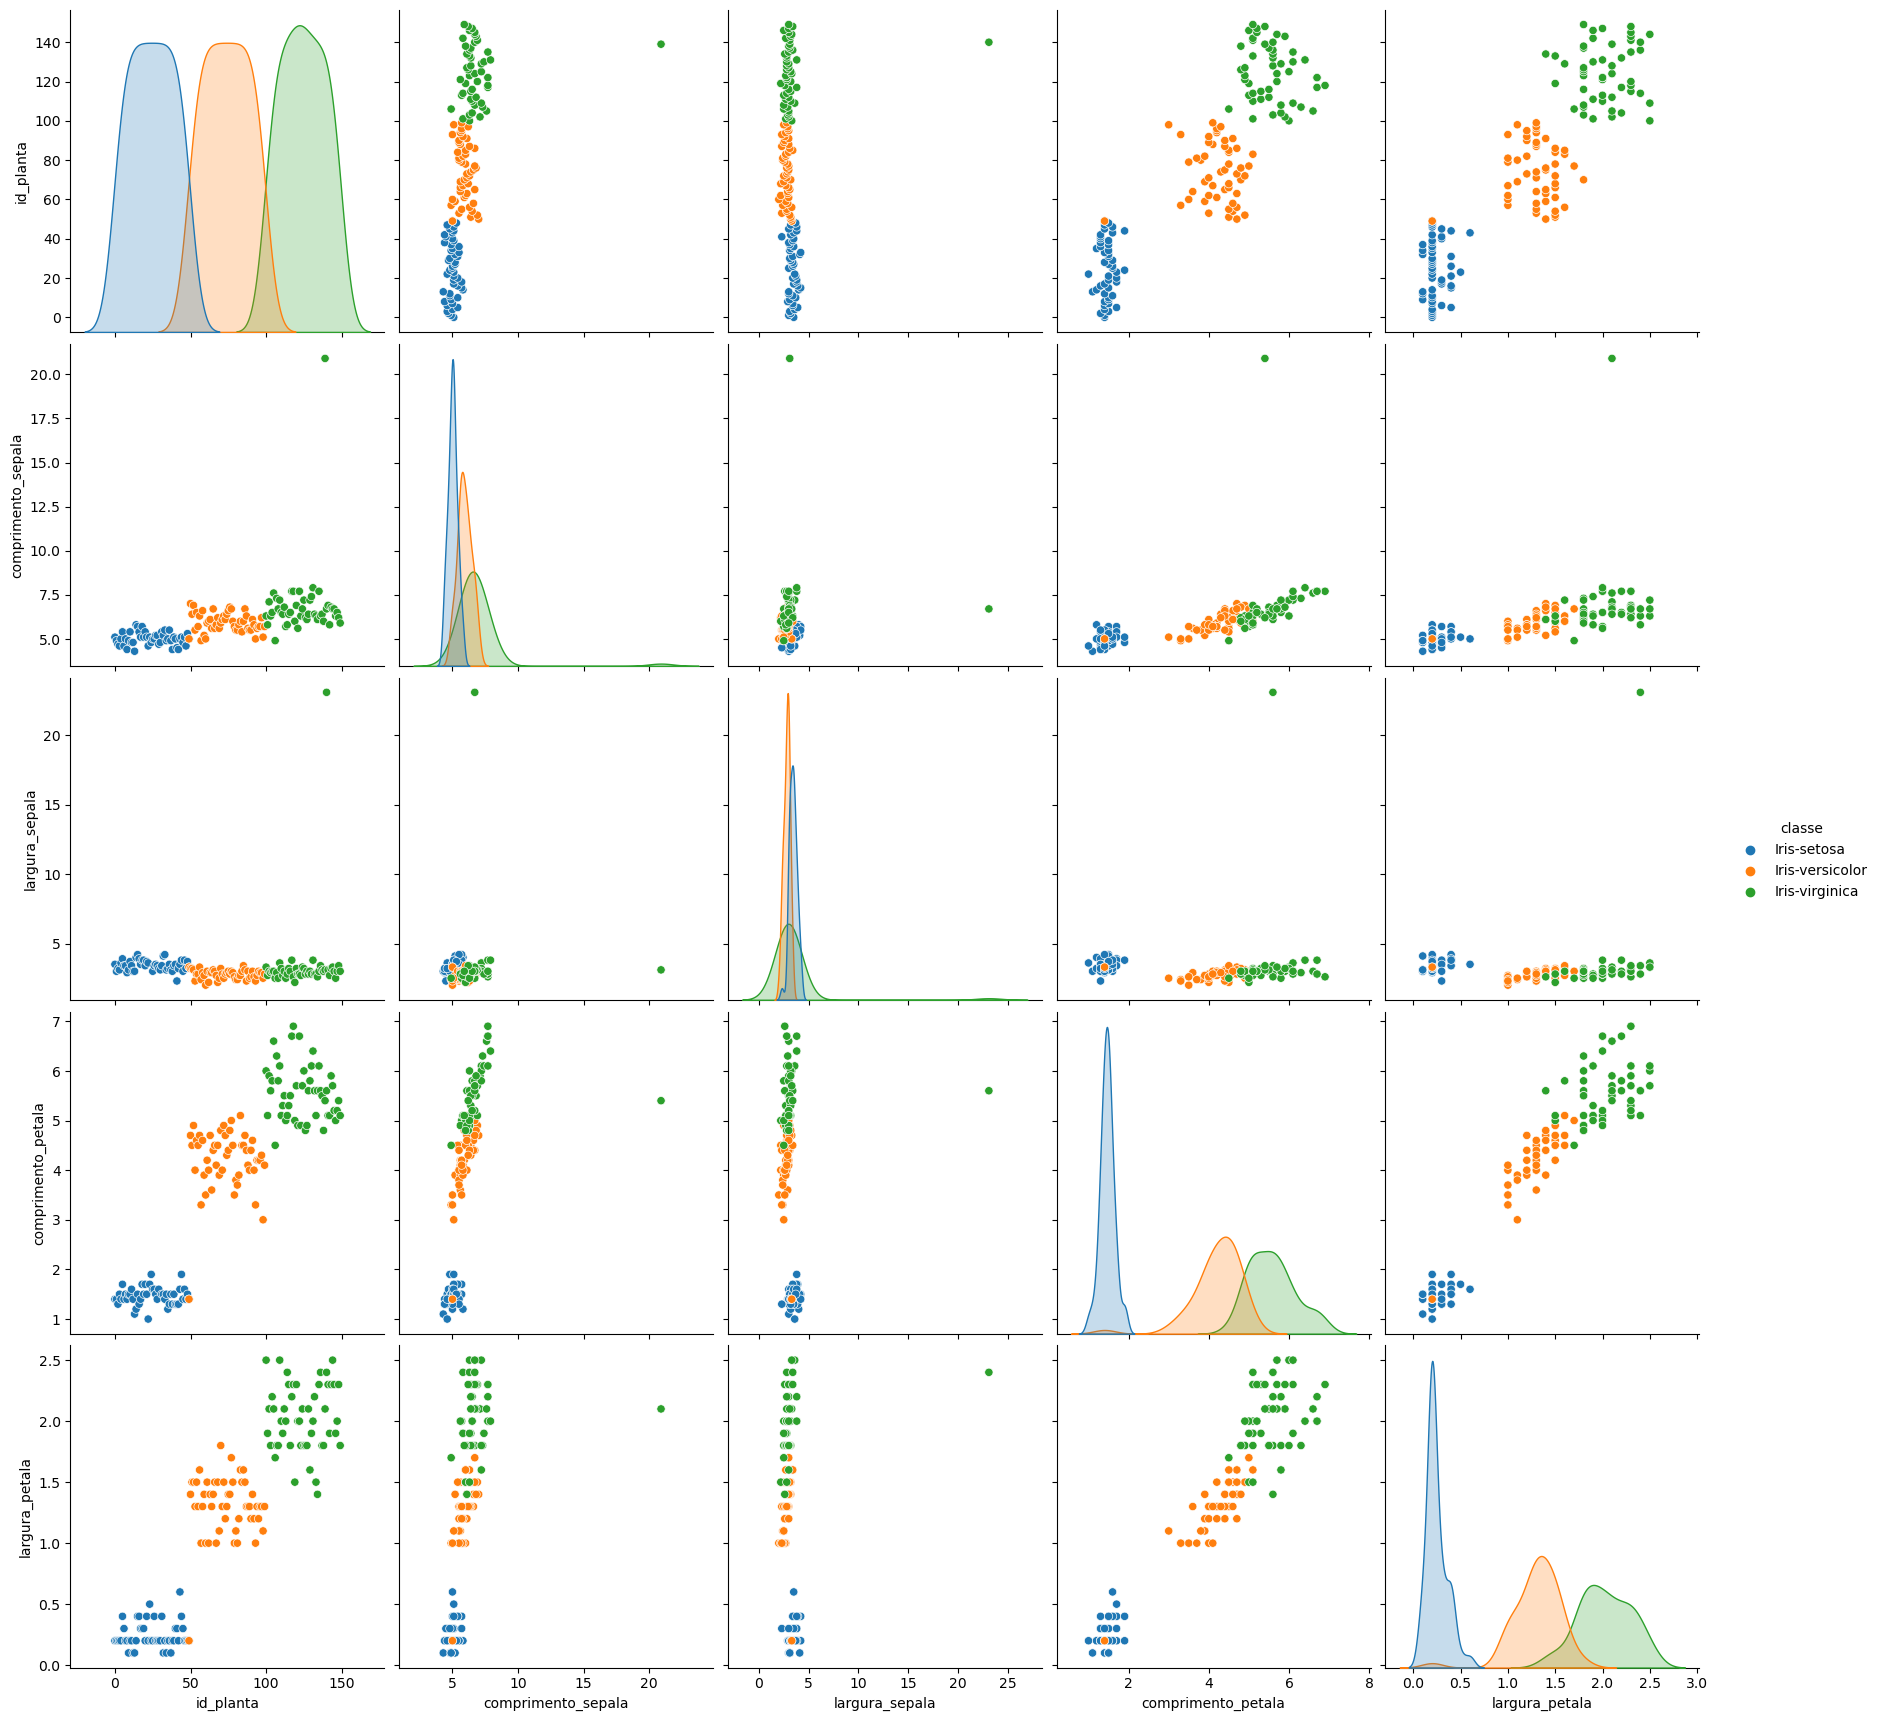

In [63]:
# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Observando os gráficos de dispersão, é fácil perceber que existem duas amostras da classe *Iris-virginica* que estão deslocadas no espaço em relação às demais amostras.

Pelos gráficos, os *outliers* parecem ser mais visíveis na combinação dos atributos `comprimento_sepala` e `largura_sepala`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

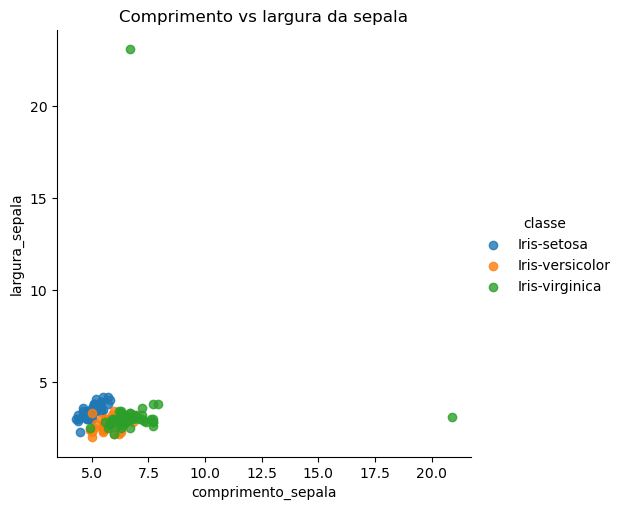

In [64]:
# define o scatter plot
sns.lmplot(x='comprimento_sepala', y='largura_sepala', data=df_dataset, 
           fit_reg=False,  
           hue='classe')

# cria um título para o gráfico
plt.title('Comprimento vs largura da sepala')

# mostra o gráfico
plt.show()

Pelos gráficos vistos até o momento, fica claro que um dos *outliers* possui um alto valor no atributo `largura_sepala`. Já o segundo outlier contém um alto valor no atributo `comprimento_sepala`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

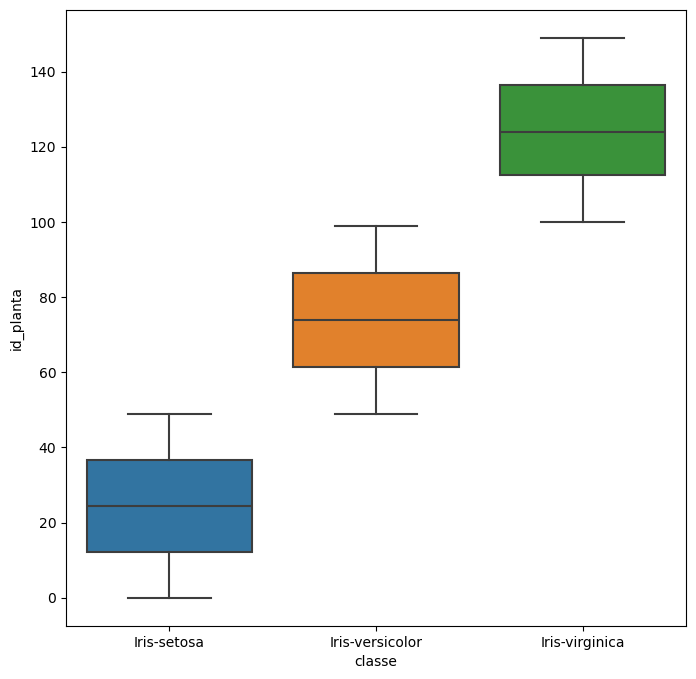

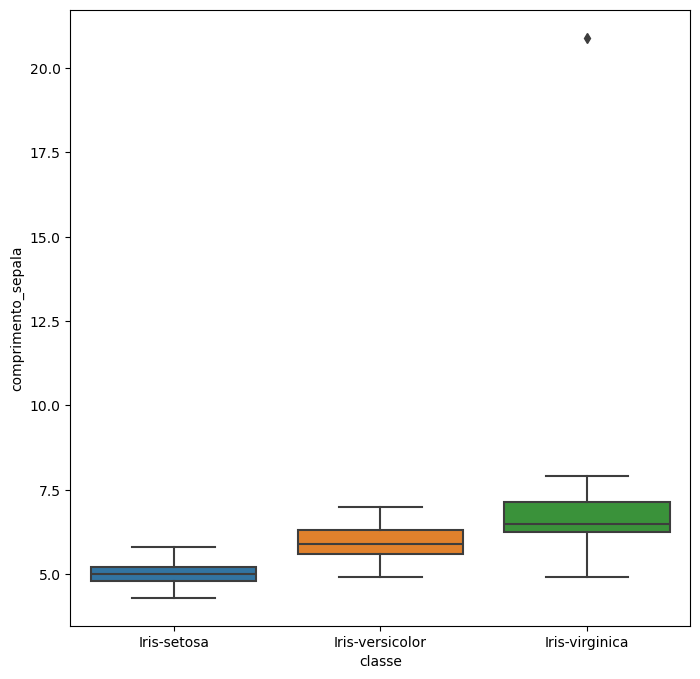

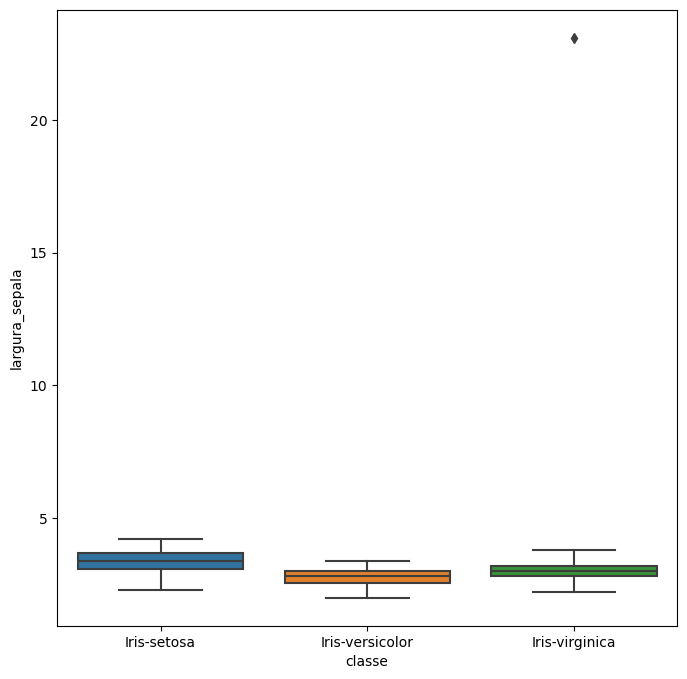

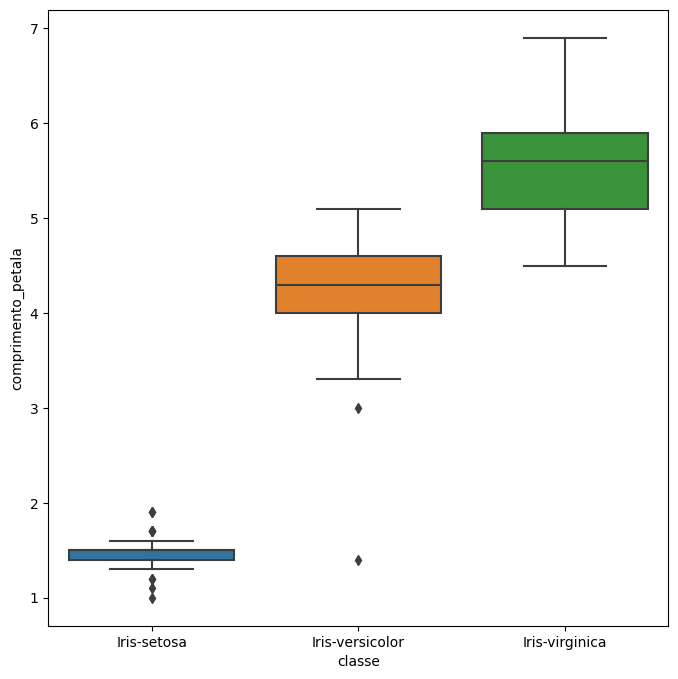

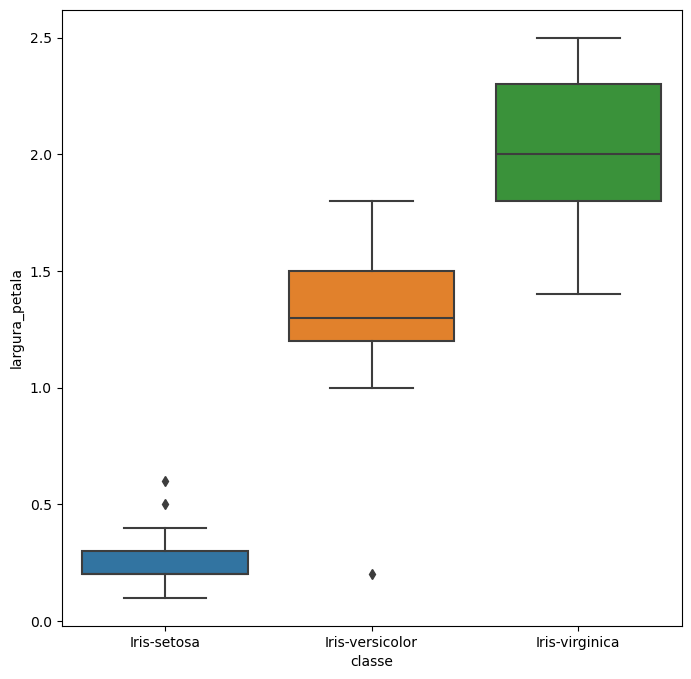

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [65]:
for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))

    # cria o boxplot
    sns.boxplot(x="classe", y=atributo, data=df_dataset, whis=1.5)

    # mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

In [ ]:
for atributo in df_dataset.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Nos histogramas, os *outliers* mais evidentes estão nos atributos `comprimento_sepala` e `largura_sepala`.

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

### Exercício

6. Remova as instâncias consideradas outliers do dataset. Vamos considerar como outliers valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$. Utilize como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

In [ ]:
#Remova outliers aqui

Depois da remoção, se analizarmos o box plot e os gráficos de dispersão deveremos observar que não há mais nenhum *outlier* na base de dados. 

Abaixo vamos plotar os gráficos novamente.

In [ ]:
# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Com os novos gráficos de dispersão, também é possível perceber que a classe *Iris-setosa* é mais fácil de identificar, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes *Iris-versicolor* e *Iris-virginica* se misturam.

**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a *outliers*. Diante disso, em alguns problemas, é recomendável remover apenas aqueles *outliers* que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 


## Distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

In [ ]:
print( df_dataset['classe'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

Conforme podemos ver acima, as 3 classes possuem aproximadamente 50 instâncias cada uma, ou seja, temos um dataset balanceado. Se o número de exemplos em alguma das classes fosse muito superior às demais, teríamos que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando as funções nativas de correlação e covariância da bilioteca `Pandas`.

In [ ]:
# matriz de covariancia
df_covariance = df_dataset[["comprimento_sepala","comprimento_petala",
                            "largura_sepala", "largura_petala"]].cov()

# matriz de correlação
df_correlation = df_dataset[["comprimento_sepala","comprimento_petala",
                            "largura_sepala", "largura_petala"]].corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Podemos ver que os atributos `comprimento_petala` e `largura_petala` possuem alta covariância e alta correlação. Se o problema que estamos analisando tivesse muitos atributos, poderíamos pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em <http://www.tylervigen.com/spurious-correlations>.

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

[2] Faceli, Katti, et al. Inteligência artificial: uma abordagem de aprendizado de máquina. (2021).
---